# NFL Projections Final MIDS 207 Project

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten



Importing the dataset. 

In [105]:
data = pd.read_csv('./NFL.csv')
data.head()

Year                   Player   Age       School  Height      Weight  \
0  2009    Beanie Wells\WellCh00  20.0     Ohio St.  1.8542  106.594207   
1  2009      Will Davis\DaviWi99  22.0     Illinois  1.8796  118.387609   
2  2009  Herman Johnson\JohnHe23  24.0          LSU  2.0066  165.107623   
3  2009  Rashad Johnson\JohnRa98  23.0      Alabama  1.8034   92.079251   
4  2009      Cody Brown\BrowCo96  22.0  Connecticut  1.8796  110.676538   

   Sprint_40yd  Vertical_Jump  Bench_Press_Reps  Broad_Jump  Agility_3cone  \
0         4.38          85.09              25.0      325.12            NaN   
1         4.84          83.82              27.0      292.10           7.38   
2         5.50            NaN              21.0         NaN            NaN   
3         4.49          93.98              15.0      304.80           7.09   
4         4.76          92.71              26.0      304.80           7.10   

   Shuttle                          Drafted..tm.rnd.yr.        BMI  \
0      NaN   Arizona Cardinals / 1st / 31st pick / 2009  31.004194   
1     4.45  Arizona Cardinals / 6th / 204th pick / 2009  33.510073   
2      NaN  Arizona Cardinals / 5th / 167th pick / 2009  41.005821   
3     4.23   Arizona Cardinals / 3rd / 95th pick / 2009  28.312463   
4     4.40   Arizona Cardinals / 2nd / 63rd pick / 2009  31.327425   

  Player_Type      Position_Type Position Drafted  
0     offense    backs_receivers       RB     Yes  
1     defense  defensive_lineman       DE     Yes  
2     offense  offensive_lineman       OG     Yes  
3     defense     defensive_back       FS     Yes  
4     defense        line_backer      OLB     Yes

In [106]:
#First we want to check to ensure that there are no duplicates in the player column. 
print(data['Player'].value_counts())
print('We can see that there are 2 players that are listed as Chris Jones. It is important to make sure that the same entry was not made twice. ')
data[data['Player'] == 'Chris Jones'] 

Player
Chris Jones                  2
Beanie Wells\WellCh00        1
Sam Swank                    1
Michael Bennett\BennMi99     1
Kahlil Bell\BellKa00         1
                            ..
Alfred Blue\BlueAl00         1
Xavier Su'a-Filo\Sua-Xa00    1
Jeoffrey Pagan\PagaJe00      1
Jadeveon Clowney\ClowJa00    1
Nasir Adderley               1
Name: count, Length: 3476, dtype: int64
We can see that there are 2 players that are listed as Chris Jones. It is important to make sure that the same entry was not made twice. 


Year       Player  Age    School  Height     Weight  Sprint_40yd  \
3029  2015  Chris Jones  NaN   Alabama  1.7780  82.553811         4.63   
3347  2018  Chris Jones  NaN  Nebraska  1.8288  88.450512         4.57   

      Vertical_Jump  Bench_Press_Reps  Broad_Jump  Agility_3cone  Shuttle  \
3029          82.55               8.0      302.26           6.91     4.19   
3347            NaN              14.0         NaN            NaN      NaN   

     Drafted..tm.rnd.yr.        BMI Player_Type    Position_Type Position  \
3029                 NaN  26.114013     offense  backs_receivers       WR   
3347                 NaN  26.446483     defense   defensive_back       CB   

     Drafted  
3029      No  
3347      No

In [107]:
print(data['Drafted'].value_counts())


Drafted
Yes    2254
No     1223
Name: count, dtype: int64


In [108]:
print(data['Year'].value_counts())

Year
2014    333
2013    332
2011    329
2016    329
2009    327
2017    327
2010    326
2012    324
2015    322
2018    308
2019    220
Name: count, dtype: int64


In [109]:
# For our model we will need to convert the drafted values to Binary. 

data['Drafted'] = data['Drafted'].map({'Yes': 1, 'No': 0}).astype('int')
data.head()



Year                   Player   Age       School  Height      Weight  \
0  2009    Beanie Wells\WellCh00  20.0     Ohio St.  1.8542  106.594207   
1  2009      Will Davis\DaviWi99  22.0     Illinois  1.8796  118.387609   
2  2009  Herman Johnson\JohnHe23  24.0          LSU  2.0066  165.107623   
3  2009  Rashad Johnson\JohnRa98  23.0      Alabama  1.8034   92.079251   
4  2009      Cody Brown\BrowCo96  22.0  Connecticut  1.8796  110.676538   

   Sprint_40yd  Vertical_Jump  Bench_Press_Reps  Broad_Jump  Agility_3cone  \
0         4.38          85.09              25.0      325.12            NaN   
1         4.84          83.82              27.0      292.10           7.38   
2         5.50            NaN              21.0         NaN            NaN   
3         4.49          93.98              15.0      304.80           7.09   
4         4.76          92.71              26.0      304.80           7.10   

   Shuttle                          Drafted..tm.rnd.yr.        BMI  \
0      NaN   Arizona Cardinals / 1st / 31st pick / 2009  31.004194   
1     4.45  Arizona Cardinals / 6th / 204th pick / 2009  33.510073   
2      NaN  Arizona Cardinals / 5th / 167th pick / 2009  41.005821   
3     4.23   Arizona Cardinals / 3rd / 95th pick / 2009  28.312463   
4     4.40   Arizona Cardinals / 2nd / 63rd pick / 2009  31.327425   

  Player_Type      Position_Type Position  Drafted  
0     offense    backs_receivers       RB        1  
1     defense  defensive_lineman       DE        1  
2     offense  offensive_lineman       OG        1  
3     defense     defensive_back       FS        1  
4     defense        line_backer      OLB        1

In [110]:
nan_counts = data.isna().sum()
nan_counts


Year                      0
Player                    0
Age                     550
School                    0
Height                    0
Weight                    0
Sprint_40yd             174
Vertical_Jump           697
Bench_Press_Reps        905
Broad_Jump              728
Agility_3cone          1217
Shuttle                1140
Drafted..tm.rnd.yr.    1223
BMI                       0
Player_Type               0
Position_Type             0
Position                  0
Drafted                   0
dtype: int64

In [111]:
data = data.drop(columns=['Agility_3cone', 'Shuttle'])

In [112]:
data.head()

Year                   Player   Age       School  Height      Weight  \
0  2009    Beanie Wells\WellCh00  20.0     Ohio St.  1.8542  106.594207   
1  2009      Will Davis\DaviWi99  22.0     Illinois  1.8796  118.387609   
2  2009  Herman Johnson\JohnHe23  24.0          LSU  2.0066  165.107623   
3  2009  Rashad Johnson\JohnRa98  23.0      Alabama  1.8034   92.079251   
4  2009      Cody Brown\BrowCo96  22.0  Connecticut  1.8796  110.676538   

   Sprint_40yd  Vertical_Jump  Bench_Press_Reps  Broad_Jump  \
0         4.38          85.09              25.0      325.12   
1         4.84          83.82              27.0      292.10   
2         5.50            NaN              21.0         NaN   
3         4.49          93.98              15.0      304.80   
4         4.76          92.71              26.0      304.80   

                           Drafted..tm.rnd.yr.        BMI Player_Type  \
0   Arizona Cardinals / 1st / 31st pick / 2009  31.004194     offense   
1  Arizona Cardinals / 6th / 204th pick / 2009  33.510073     defense   
2  Arizona Cardinals / 5th / 167th pick / 2009  41.005821     offense   
3   Arizona Cardinals / 3rd / 95th pick / 2009  28.312463     defense   
4   Arizona Cardinals / 2nd / 63rd pick / 2009  31.327425     defense   

       Position_Type Position  Drafted  
0    backs_receivers       RB        1  
1  defensive_lineman       DE        1  
2  offensive_lineman       OG        1  
3     defensive_back       FS        1  
4        line_backer      OLB        1

In [113]:
data[['Name', 'ID']] = data['Player'].str.split('\\', expand=True)
data.drop('Player', axis=1, inplace=True)

data.columns

Index(['Year', 'Age', 'School', 'Height', 'Weight', 'Sprint_40yd',
       'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump',
       'Drafted..tm.rnd.yr.', 'BMI', 'Player_Type', 'Position_Type',
       'Position', 'Drafted', 'Name', 'ID'],
      dtype='object')

/Users/seemavora/opt/anaconda3/envs/w207/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


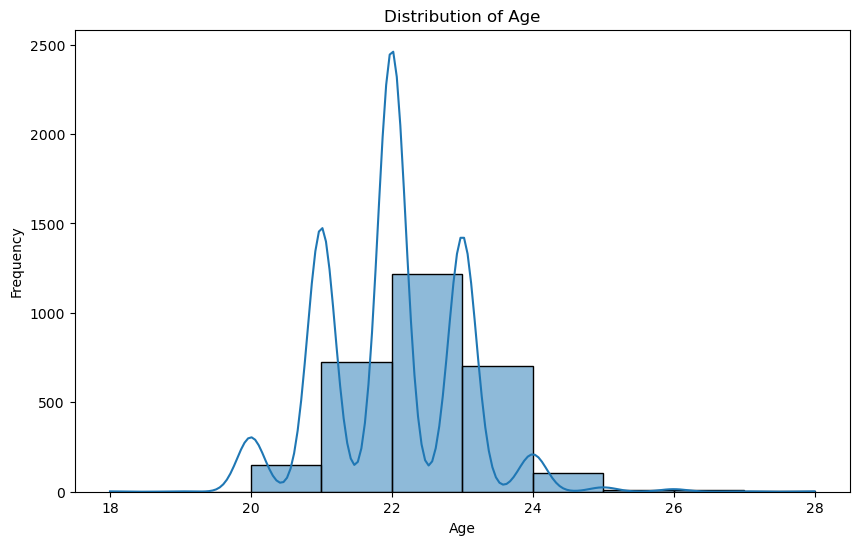

/Users/seemavora/opt/anaconda3/envs/w207/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


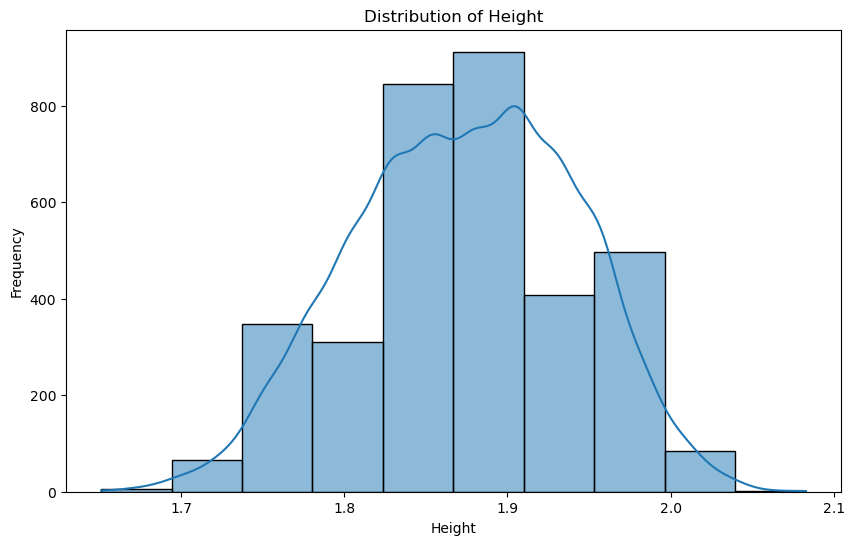

/Users/seemavora/opt/anaconda3/envs/w207/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


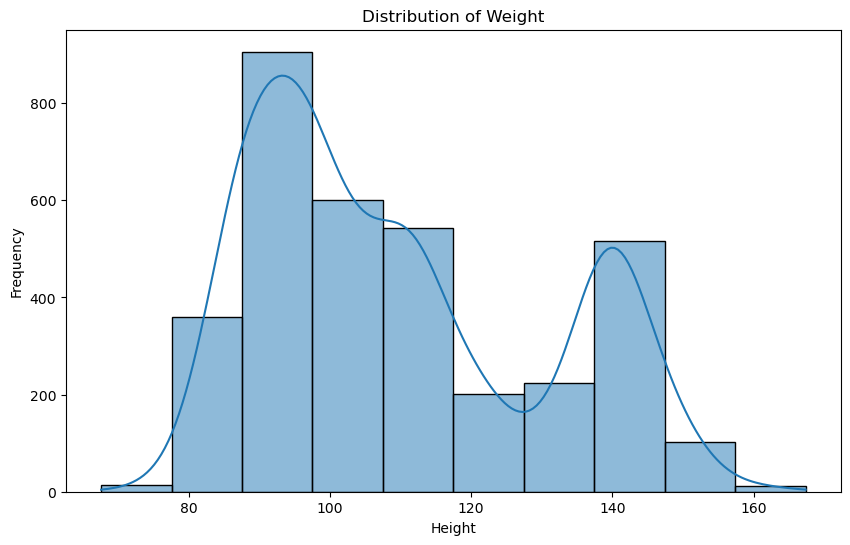

In [114]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Height
plt.figure(figsize=(10, 6))
sns.histplot(data['Height'], bins=10, kde=True)
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

# Distribution of Weight
plt.figure(figsize=(10, 6))
sns.histplot(data['Weight'], bins=10, kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

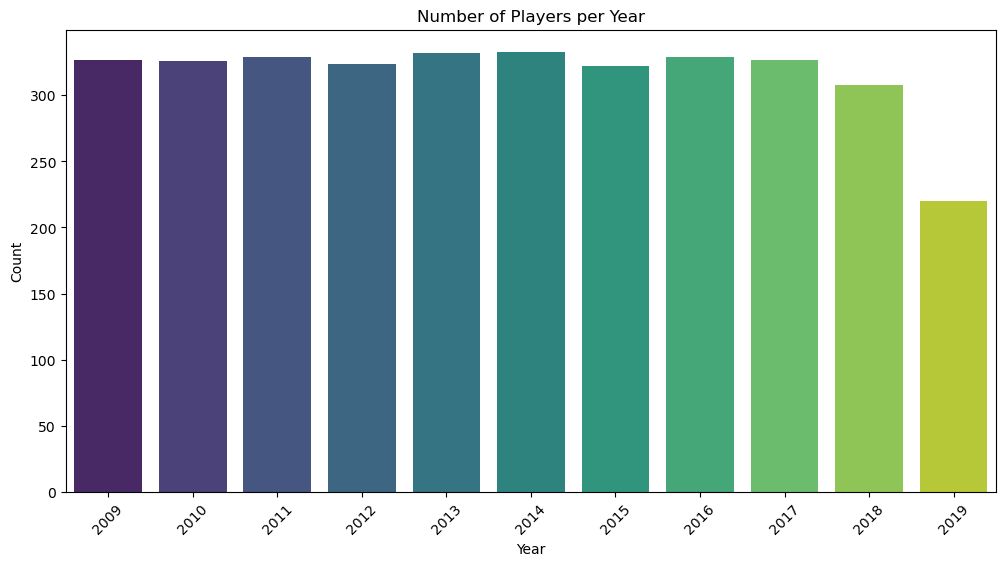

In [115]:

year_counts = data['Year'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')
plt.title('Number of Players per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/Users/seemavora/opt/anaconda3/envs/w207/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/seemavora/opt/anaconda3/envs/w207/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/seemavora/opt/anaconda3/envs/w207/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/seemavora/opt/anaconda3/envs/w207/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na 

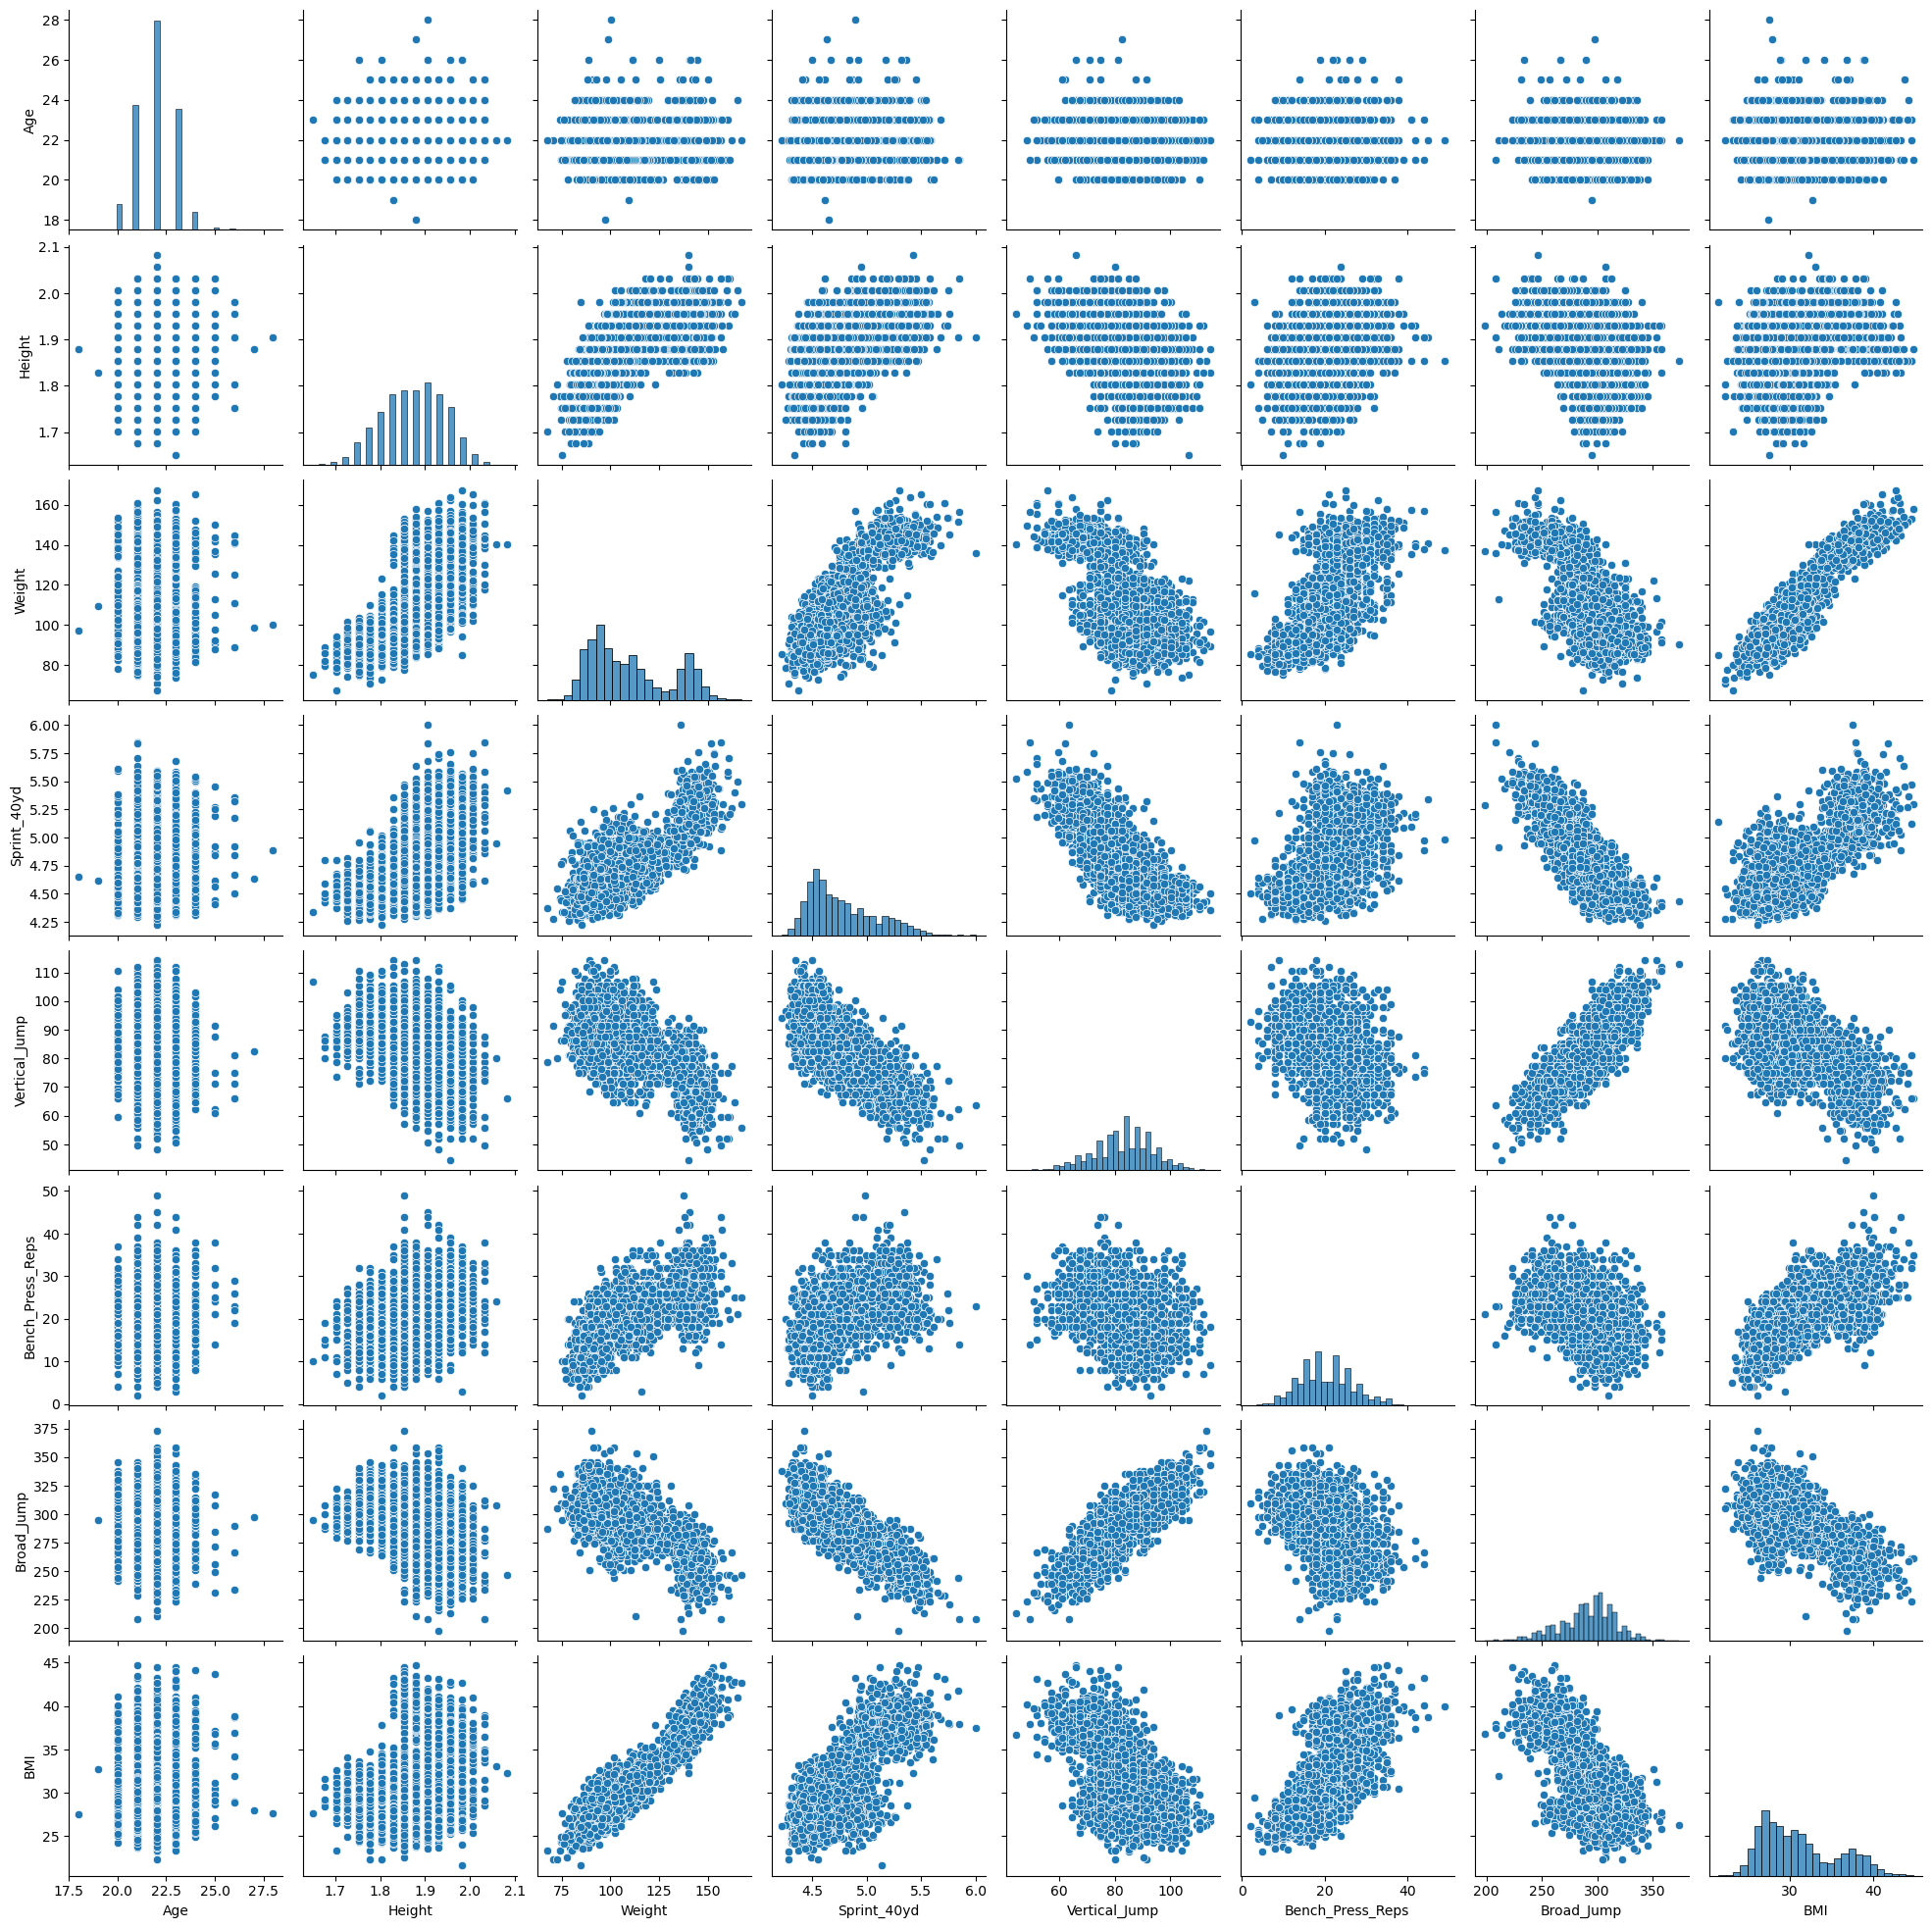

In [116]:
# Pair plot of numerical features
sns.pairplot(data[['Age', 'Height', 'Weight', 'Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'BMI']])
plt.show()

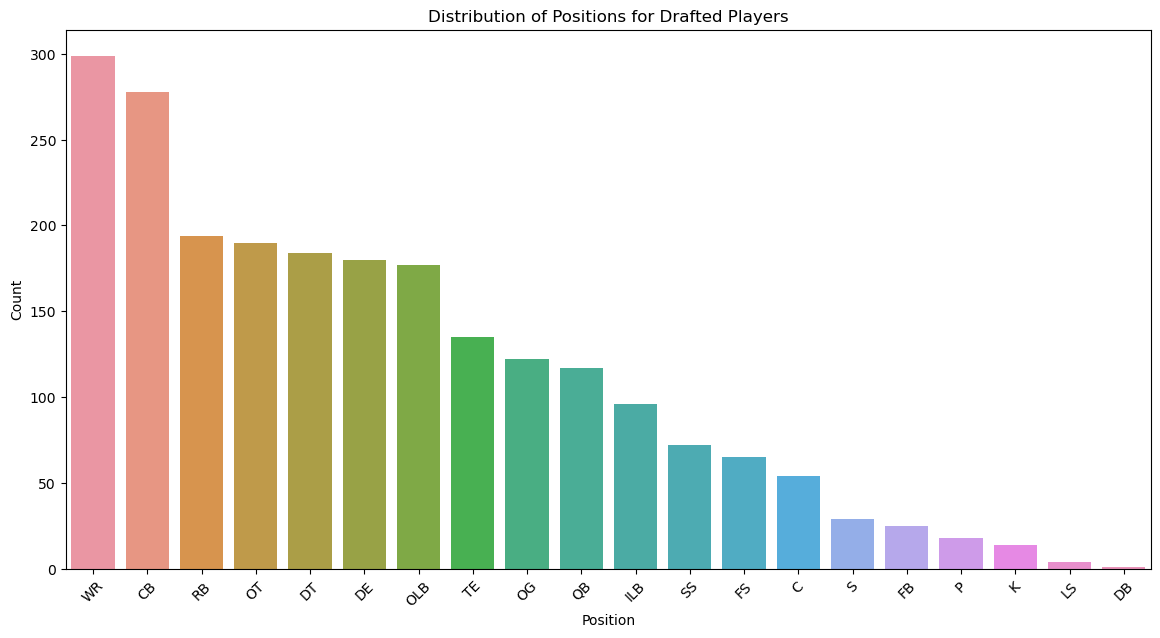

In [117]:
# Filter the data for drafted players
drafted_data = data[data['Drafted'] == 1]

# Bar plot of positions for drafted players
plt.figure(figsize=(14, 7))
sns.countplot(x='Position', data=drafted_data, order=drafted_data['Position'].value_counts().index)
plt.title('Distribution of Positions for Drafted Players')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

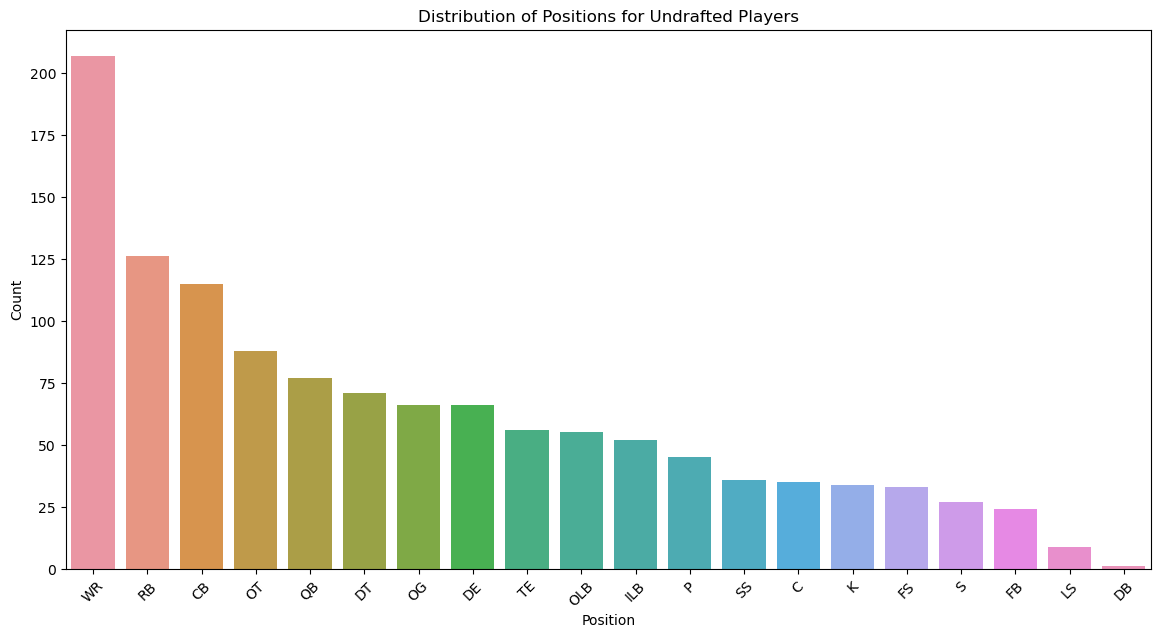

In [118]:
# Filter the data for drafted players
undrafted_data = data[data['Drafted'] == 0]

# Bar plot of positions for drafted players
plt.figure(figsize=(14, 7))
sns.countplot(x='Position', data=undrafted_data, order=undrafted_data['Position'].value_counts().index)
plt.title('Distribution of Positions for Undrafted Players')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

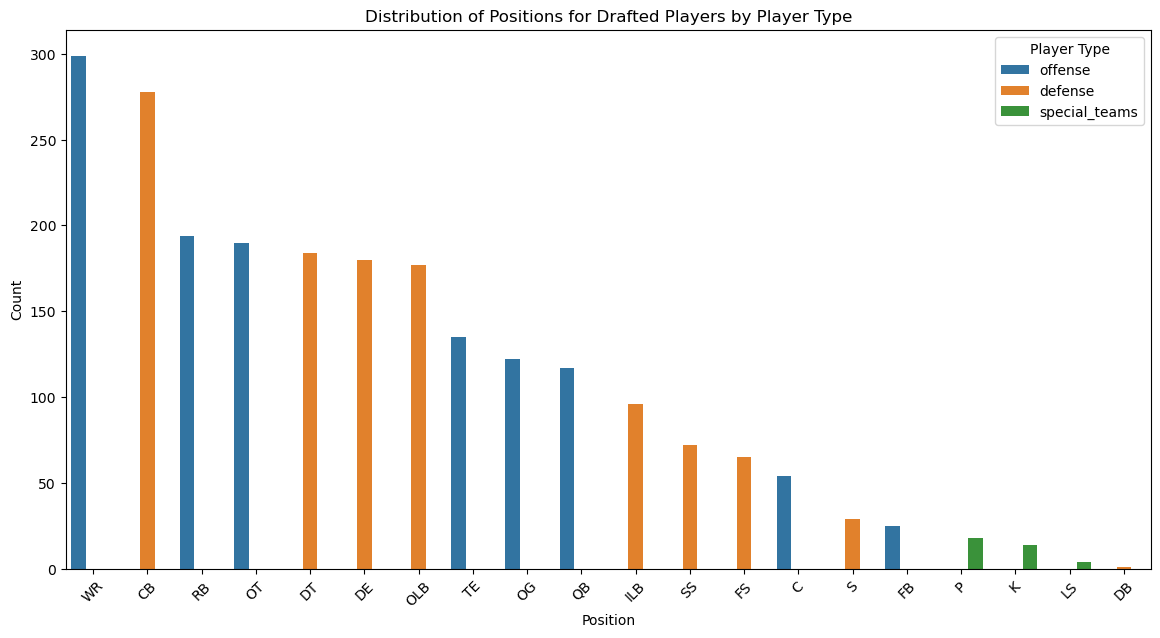

In [119]:
# Bar plot of positions for drafted players with player type
plt.figure(figsize=(14, 7))
sns.countplot(x='Position', hue='Player_Type', data=drafted_data, order=drafted_data['Position'].value_counts().index)
plt.title('Distribution of Positions for Drafted Players by Player Type')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Player Type')
plt.show()

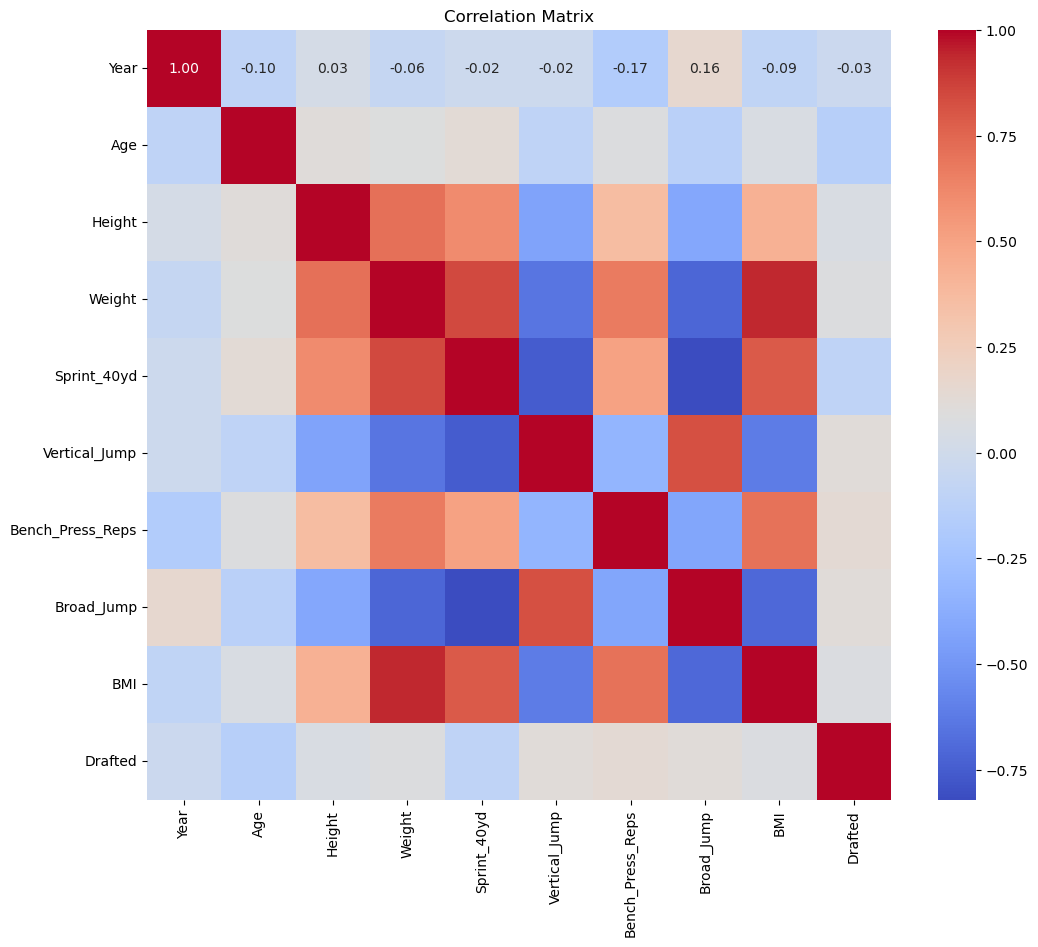

In [120]:
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()


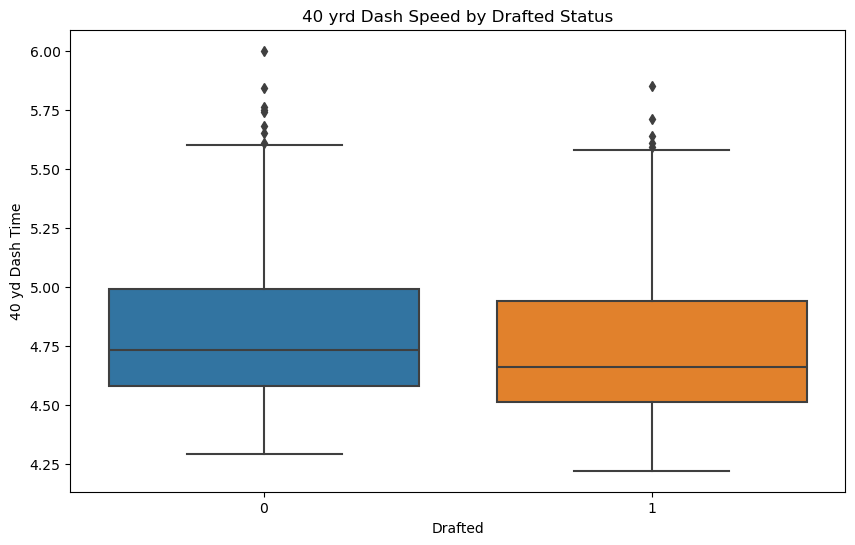

In [121]:
#Jenna Graphs - Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Drafted', y='Sprint_40yd', data=data)
plt.title('40 yrd Dash Speed by Drafted Status')
plt.xlabel('Drafted')
plt.ylabel('40 yd Dash Time')
plt.show()

/Users/seemavora/opt/anaconda3/envs/w207/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/seemavora/opt/anaconda3/envs/w207/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/seemavora/opt/anaconda3/envs/w207/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/seemavora/opt/anaconda3

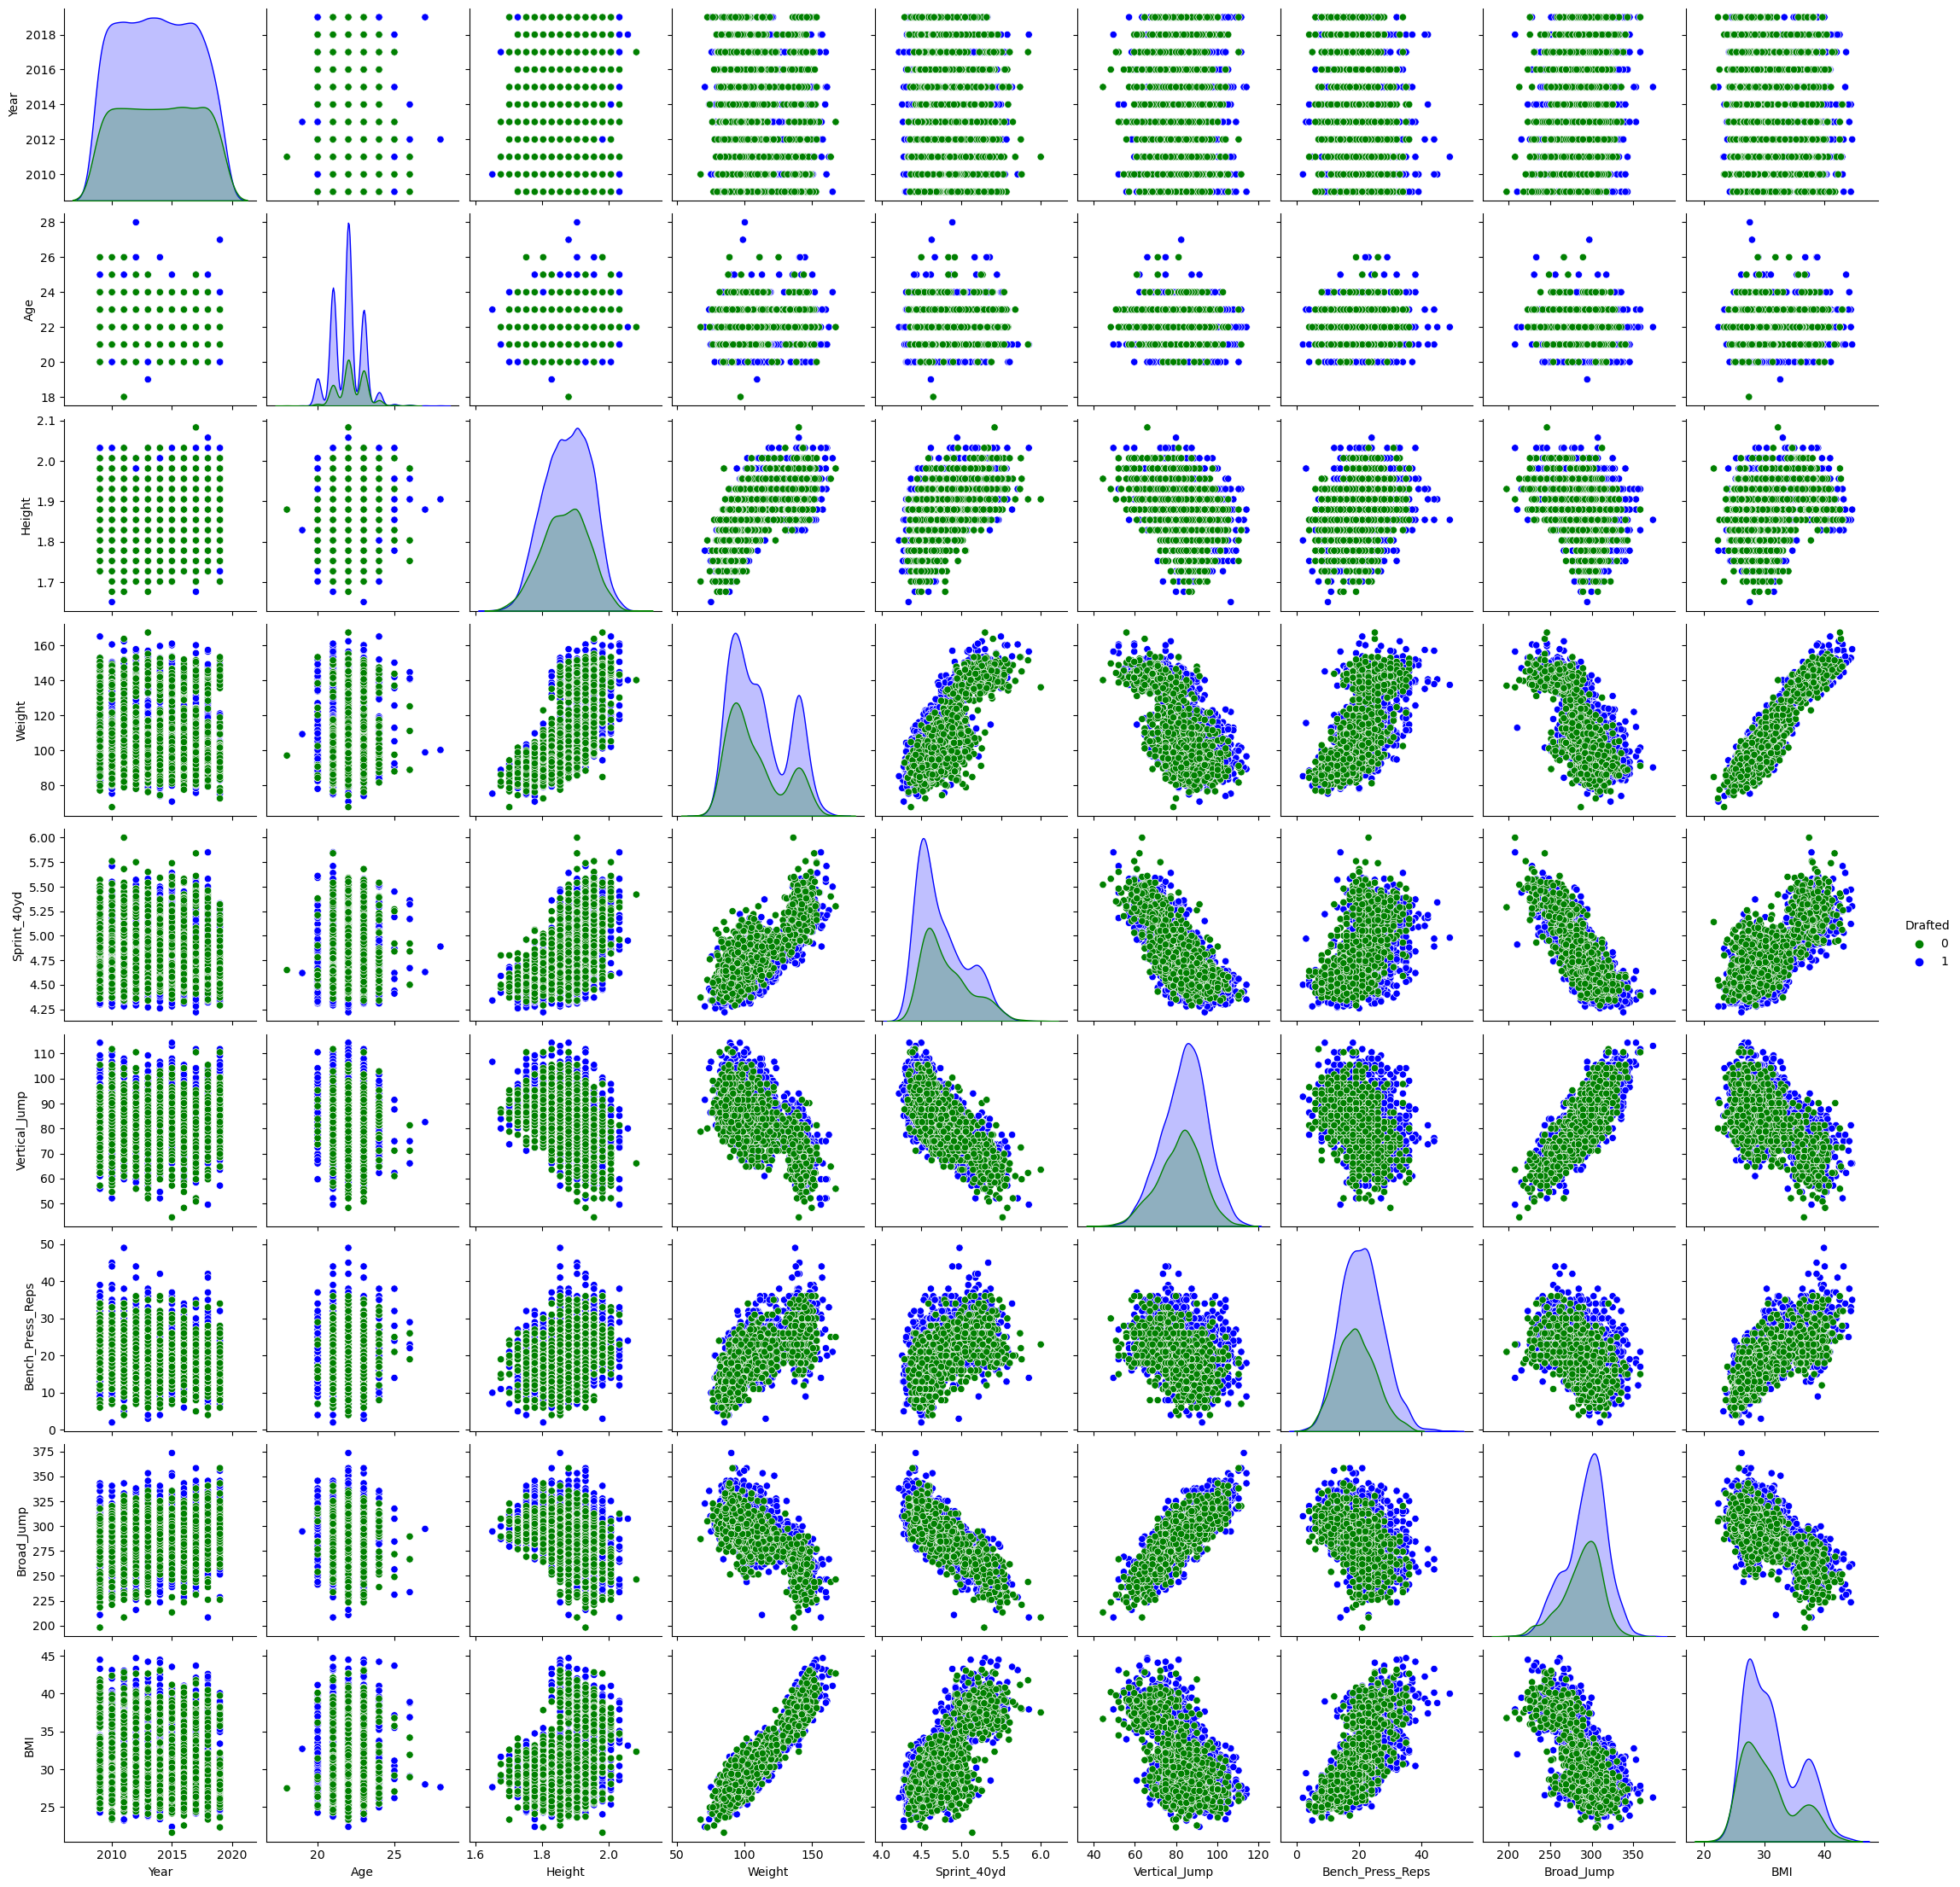

In [122]:
#Jenna Graphs - Pairplot
palette = {1:"blue", 0:"green"}
sns.pairplot(data, hue='Drafted', palette=palette)
plt.show()

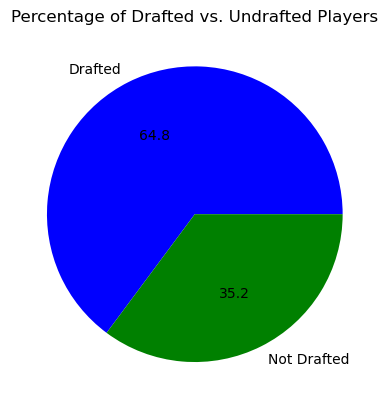

In [123]:
#Jenna Graph
# Looking  at the split in the data between drafted and non drafted
draft_counts = data['Drafted'].value_counts()
labels = ['Drafted', 'Not Drafted']
colors = ['blue', 'green']

plt.pie(draft_counts, labels=labels, colors=colors, autopct='%.1f')
plt.title('Percentage of Drafted vs. Undrafted Players')
plt.show()

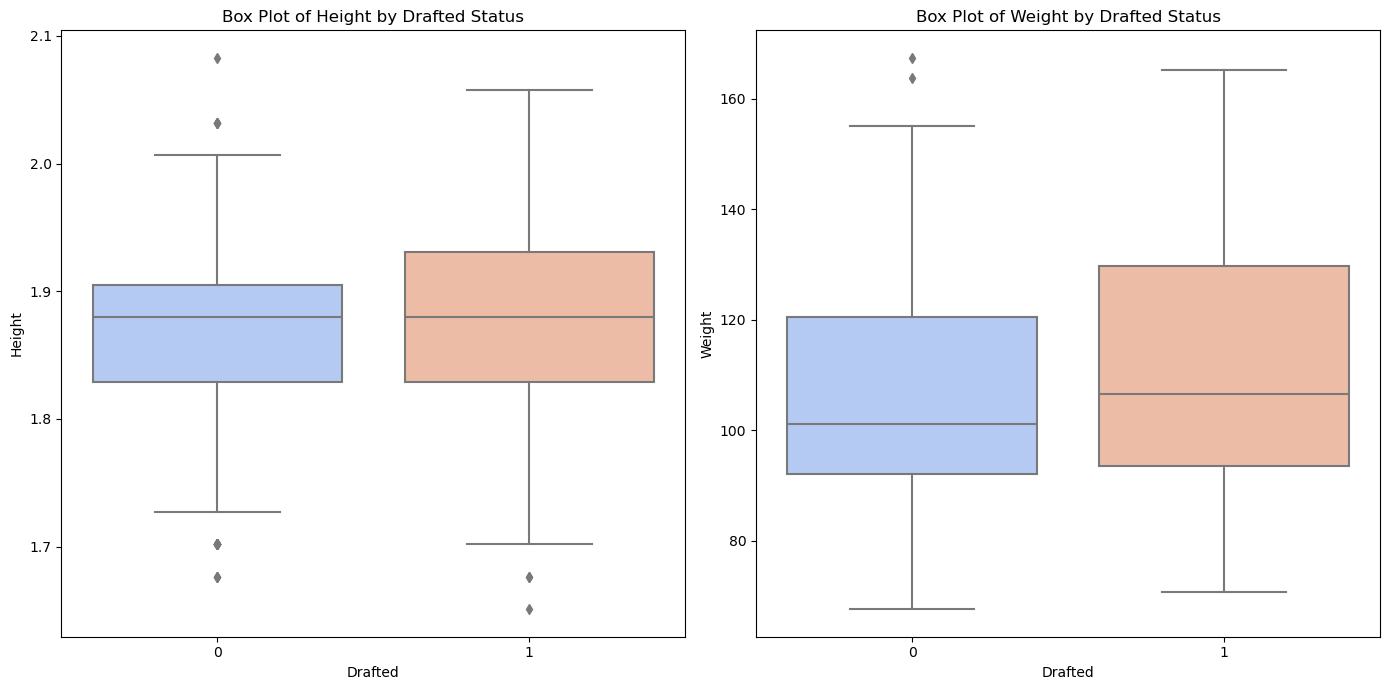

In [124]:
# Seema Graph
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(x='Drafted', y='Height', data=data, palette='coolwarm')
plt.title('Box Plot of Height by Drafted Status')

plt.subplot(1, 2, 2)
sns.boxplot(x='Drafted', y='Weight', data=data, palette='coolwarm')
plt.title('Box Plot of Weight by Drafted Status')

plt.tight_layout()
plt.show()

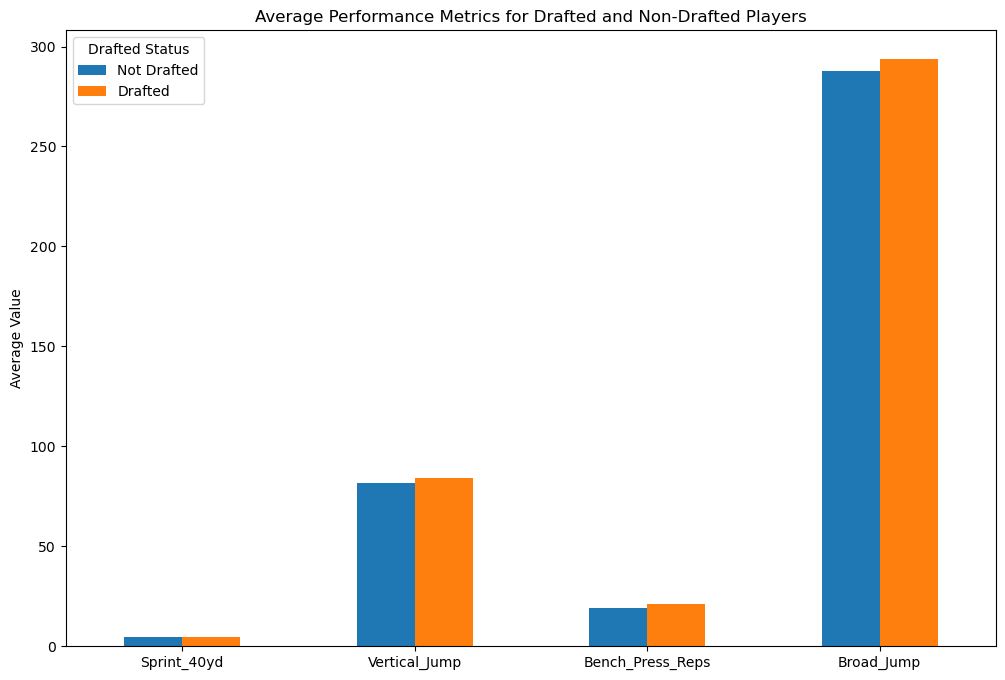

In [125]:
# Seema Graph
average_values = data.groupby('Drafted')[['Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump']].mean().T
average_values.columns = ['Not Drafted', 'Drafted']

# Plot the bar chart
average_values.plot(kind='bar', figsize=(12, 8))
plt.title('Average Performance Metrics for Drafted and Non-Drafted Players')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.legend(title='Drafted Status')
plt.show()

# Data Prep for Model with All Data Points 
This model work has been completed by Aditya. 

In [126]:
# Separate numeric and non-numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns

# Fill missing numerical values with the median
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

#Defining Categorical Columns (String based columns)
categorical_columns = data.select_dtypes(include=['object']).columns

# Encode categorical variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column].astype(str))

# Drop unnecessary columns
data.drop(['Drafted..tm.rnd.yr.'], axis=1, inplace=True)



In [127]:
#Increasing the number of samples
#Imported from Jenna Notebook
from sklearn.utils import resample
drafted = data[data['Drafted']==1]
not_drafted = data[data['Drafted']==0]
not_drafted_additional_samples = resample(not_drafted, replace=True, n_samples = len(drafted), random_state = 42)
new_data = pd.concat([drafted, not_drafted_additional_samples])

# Feature Selection

In [128]:
# Define features and target
X = new_data.drop(columns=['Drafted'])
y = new_data['Drafted']

In [129]:
# Split the data into train, validation, and test sets

#X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#Jenna Version

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, random_state= 42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2524, 15)
Shape of X_val: (631, 15)
Shape of X_test: (1353, 15)
Shape of y_train: (2524,)
Shape of y_val: (631,)
Shape of y_test: (1353,)


In [130]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [131]:
y_train_cat = to_categorical(y_train, num_classes=2)
y_val_cat = to_categorical(y_val, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)


In [132]:
# Print the feature names used in the models
feature_names = data.drop(columns=['Drafted']).columns  # Drop the target column
print("Features used in the model:")
print(feature_names)

Features used in the model:
Index(['Year', 'Age', 'School', 'Height', 'Weight', 'Sprint_40yd',
       'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'BMI', 'Player_Type',
       'Position_Type', 'Position', 'Name', 'ID'],
      dtype='object')


# Building the model

## Model 1: Simple Neural Network

In [133]:
# Build a simple neural network model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(2, activation='softmax')  # 2 classes: drafted and not drafted
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_cat, epochs=100, batch_size=32, validation_data=(X_val, y_val_cat),verbose=0)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val_cat)


# Make predictions
y_val_pred = model.predict(X_val)
y_val_pred_classes = y_val_pred.argmax(axis=1)
y_test_pred = model.predict(X_test)
y_test_pred_classes = y_test_pred.argmax(axis=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)

# Model Summary
model.summary()

# Training accuracy (using the final epoch training accuracy from history)
train_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

43/43 [==============================] - 0s 668us/step - loss: 0.5176 - accuracy: 0.8071
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               8192      
                                                                 
 dense_5 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 9,218
Trainable params: 9,218
Non-trainable params: 0
_________________________________________________________________
Training Accuracy: 0.9501
Validation Accuracy: 0.8067
Test Accuracy: 0.8071


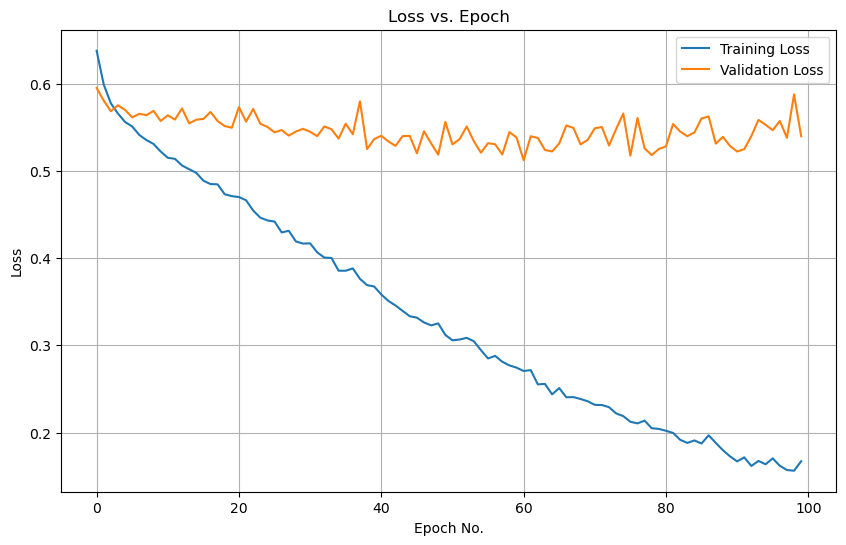

In [134]:
# Plotting training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch No.')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [135]:
"""0. Numpy_review_AK.ipynb# Make predictions
y_test_pred = model.predict(X_test)
y_test_pred_classes = y_test_pred.argmax(axis=1)

# Combine the predictions with the actual labels and features for comparison
test_results = pd.DataFrame(X_test, columns=X.columns)
test_results['Actual'] = y_test
test_results['Predicted'] = y_test_pred_classes
test_results['Name'] = data.loc[test_results.index, 'Name']

test_results = test_results[['Name', 'Actual', 'Predicted']]

# Print a sample of the results
print(test_results.sample(10))
"""

"0. Numpy_review_AK.ipynb# Make predictions\ny_test_pred = model.predict(X_test)\ny_test_pred_classes = y_test_pred.argmax(axis=1)\n\n# Combine the predictions with the actual labels and features for comparison\ntest_results = pd.DataFrame(X_test, columns=X.columns)\ntest_results['Actual'] = y_test\ntest_results['Predicted'] = y_test_pred_classes\ntest_results['Name'] = data.loc[test_results.index, 'Name']\n\ntest_results = test_results[['Name', 'Actual', 'Predicted']]\n\n# Print a sample of the results\nprint(test_results.sample(10))\n"

## Visualizing the predictions

In [136]:
# Ensure indices are reset to align correctly
X_test = pd.DataFrame(X_test, columns=X.columns).reset_index(drop=True)
y_test = pd.Series(y_test).reset_index(drop=True)

# Make predictions
y_test_pred = model.predict(X_test)
y_test_pred_classes = y_test_pred.argmax(axis=1)

# Combine the predictions with the actual labels and features for comparison
test_results = X_test.copy()
test_results['Actual'] = y_test
test_results['Predicted'] = y_test_pred_classes

# Assuming 'data' has the original indices
test_results['Name'] = data.iloc[test_results.index]['Name']

test_results = test_results[['Actual', 'Predicted']]

# Print a sample of the results
print(test_results.head(15))

43/43 [==============================] - 0s 595us/step
    Actual  Predicted
0        1          1
1        1          1
2        0          0
3        1          1
4        0          0
5        1          1
6        0          0
7        0          0
8        1          0
9        0          0
10       1          1
11       1          1
12       0          0
13       1          0
14       0          0


# Calculating the model accuracy

In [137]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Print Confusion Matrix and Classification Report
print("Test Set Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_classes))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_classes))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_test_pred_classes))

Test Set Evaluation
Confusion Matrix:
[[555  97]
 [164 537]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       652
           1       0.85      0.77      0.80       701

    accuracy                           0.81      1353
   macro avg       0.81      0.81      0.81      1353
weighted avg       0.81      0.81      0.81      1353


Accuracy Score:
0.8070953436807096


## Model 2: Logistic Regression

In [138]:
# Model 2 - Logistic Regression

# Initialize the logistic regression model
num_features = X_train.shape[1]
learning_rate = 0.01

model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(
    units=1,        # output dim
    input_shape=(num_features,),  # input dim
    use_bias=True,               # use a bias (intercept) param
    activation='sigmoid',
    kernel_initializer=tf.keras.initializers.Ones(),  # initialize params to 1
    bias_initializer=tf.keras.initializers.Ones(),    # initialize bias to 1
))

# Choose an optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

# Compile the model
model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_val, y_val), verbose=0)

#Model Summary
model2.summary()

print("Evaluating the results now:")
# Evaluate the model on the training set
train_loss2, train_accuracy2 = model2.evaluate(X_train, y_train)
print(f"Training Accuracy: {train_accuracy2:.4f}")

# Evaluate the model on the validation set
val_loss2, val_accuracy2 = model2.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy2:.4f}")

# Evaluate the model on the test set
test_loss2, test_accuracy2= model2.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy2:.4f}")



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 16        
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________
Evaluating the results now:
79/79 [==============================] - 0s 595us/step - loss: 0.6234 - accuracy: 0.6545
Training Accuracy: 0.6545
20/20 [==============================] - 0s 682us/step - loss: 0.6033 - accuracy: 0.6830
Validation Accuracy: 0.6830
43/43 [==============================] - 0s 688us/step - loss: 0.6421 - accuracy: 0.6386
Test Accuracy: 0.6386


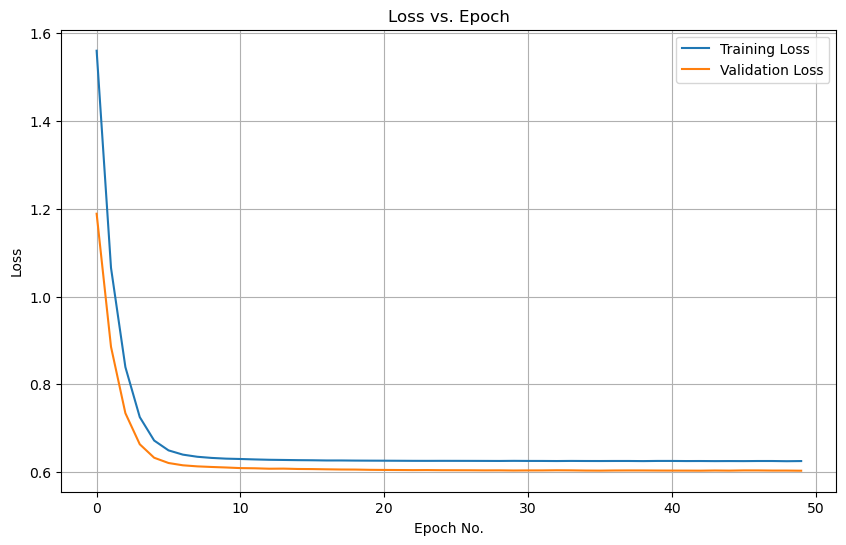

In [139]:
# Plotting training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch No.')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [140]:
"""# Get the predicted probabilities for the test set
y_test_pred_prob2 = model2.predict(X_test)

# Convert predicted probabilities to class labels (0 or 1)
y_test_pred2 = (y_test_pred_prob2 > 0.5).astype("int32")

# Combine the predictions with the actual labels and features for comparison
test_results2 = pd.DataFrame(X_test, columns=X.columns)
test_results2['Actual'] = y_test
test_results2['Predicted'] = y_test_pred2
test_results2 = test_results2[['Name', 'Actual', 'Predicted']]

# Print a sample of the results
print(test_results2.sample(10))"""

'# Get the predicted probabilities for the test set\ny_test_pred_prob2 = model2.predict(X_test)\n\n# Convert predicted probabilities to class labels (0 or 1)\ny_test_pred2 = (y_test_pred_prob2 > 0.5).astype("int32")\n\n# Combine the predictions with the actual labels and features for comparison\ntest_results2 = pd.DataFrame(X_test, columns=X.columns)\ntest_results2[\'Actual\'] = y_test\ntest_results2[\'Predicted\'] = y_test_pred2\ntest_results2 = test_results2[[\'Name\', \'Actual\', \'Predicted\']]\n\n# Print a sample of the results\nprint(test_results2.sample(10))'

## Visualizing the predictions

In [141]:
# Ensure indices are reset to align correctly
X_test = pd.DataFrame(X_test, columns=X.columns).reset_index(drop=True)
y_test = pd.Series(y_test).reset_index(drop=True)

# Make predictions for model2
y_test_pred_prob2 = model2.predict(X_test)
y_test_pred_classes2 = (y_test_pred_prob2 > 0.5).astype("int32")

# Combine the predictions with the actual labels and features for comparison for model2
test_results2 = X_test.copy()
test_results2['Actual'] = y_test
test_results2['Predicted'] = y_test_pred_classes2

# Assuming 'data' has the original indices
test_results2['Name'] = data.iloc[test_results2.index]['Name']

# Select relevant columns
test_results2 = test_results2[['Actual', 'Predicted']]

# Print a sample of the results
print(test_results2.head(15))

43/43 [==============================] - 0s 548us/step
    Actual  Predicted
0        1          1
1        1          0
2        0          1
3        1          0
4        0          1
5        1          1
6        0          1
7        0          0
8        1          1
9        0          0
10       1          1
11       1          0
12       0          0
13       1          0
14       0          1


## calculating the accuracy

In [142]:
# Print Confusion Matrix and Classification Report
print("Test Set Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_classes2))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_classes2))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_test_pred_classes2))

Test Set Evaluation
Confusion Matrix:
[[425 227]
 [262 439]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.65      0.63       652
           1       0.66      0.63      0.64       701

    accuracy                           0.64      1353
   macro avg       0.64      0.64      0.64      1353
weighted avg       0.64      0.64      0.64      1353


Accuracy Score:
0.6385809312638581


## Extra Plots

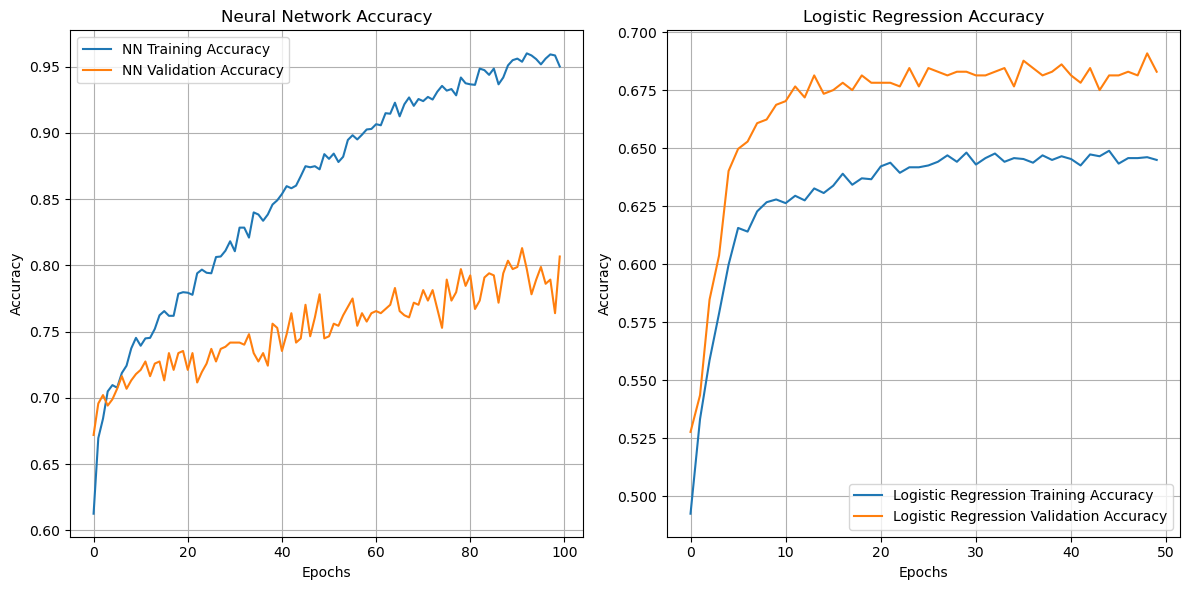

In [143]:
# Plotting the accuracies for both models
plt.figure(figsize=(12, 6))

# Neural Network Model
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='NN Training Accuracy')
plt.plot(history.history['val_accuracy'], label='NN Validation Accuracy')
plt.title('Neural Network Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Logistic Regression Model
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Logistic Regression Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Logistic Regression Validation Accuracy')
plt.title('Logistic Regression Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

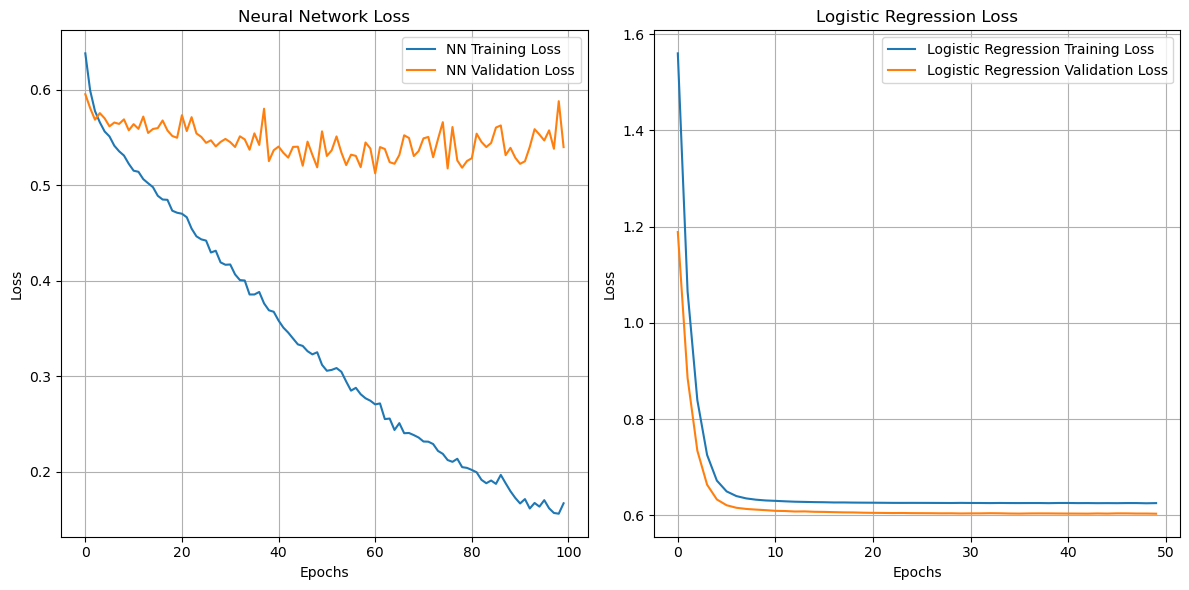

In [144]:
# Plotting the losses for both models
plt.figure(figsize=(12, 6))

# Neural Network Model
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='NN Training Loss')
plt.plot(history.history['val_loss'], label='NN Validation Loss')
plt.title('Neural Network Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Logistic Regression Model
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Logistic Regression Training Loss')
plt.plot(history2.history['val_loss'], label='Logistic Regression Validation Loss')
plt.title('Logistic Regression Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Model 3 - CNN

In [145]:
# Convert to NumPy arrays
X_train_np = np.array(X_train)
X_val_np = np.array(X_val)
X_test_np = np.array(X_test)

# Reshape the input data to be 3D
X_train_reshaped = X_train_np.reshape((X_train_np.shape[0], X_train_np.shape[1], 1))
X_val_reshaped = X_val_np.reshape((X_val_np.shape[0], X_val_np.shape[1], 1))
X_test_reshaped = X_test_np.reshape((X_test_np.shape[0], X_test_np.shape[1], 1))

model3 = Sequential([
    Conv1D(filters=512, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
history3 = model3.fit(X_train_reshaped, y_train_cat, epochs=100, batch_size=64, validation_data=(X_val_reshaped, y_val_cat),verbose=0)

#Model Summary
model3.summary()

# Evaluate the model on the validation set
val_loss3, val_accuracy3 = model3.evaluate(X_val_reshaped, y_val_cat)

# Make predictions
y_test_pred3 = model3.predict(X_test_reshaped)
y_test_pred_classes3 = y_test_pred3.argmax(axis=1)

# Evaluate the model on the test set
test_loss3, test_accuracy3 = model3.evaluate(X_test_reshaped, y_test_cat)

# Training accuracy (using the final epoch training accuracy from history)
train_accuracy3 = history3.history['accuracy'][-1]

print(f"Training Accuracy: {train_accuracy3:.4f}")
print(f"Validation Accuracy: {val_accuracy3:.4f}")
print(f"Test Accuracy: {test_accuracy3:.4f}")

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 13, 512)           2048      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6, 512)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense_7 (Dense)             (None, 512)               1573376   
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                      

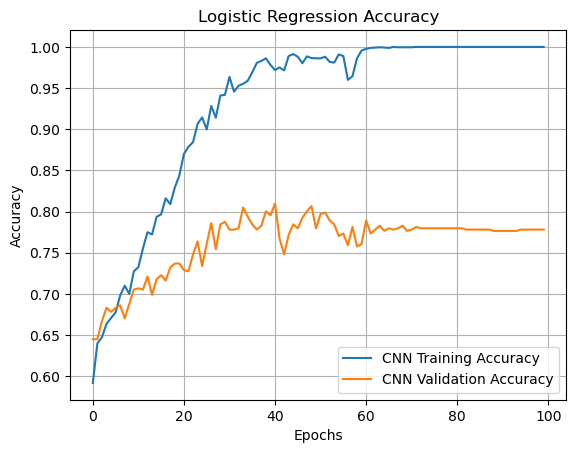

In [146]:
plt.plot(history3.history['accuracy'], label='CNN Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='CNN Validation Accuracy')
plt.title('Logistic Regression Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

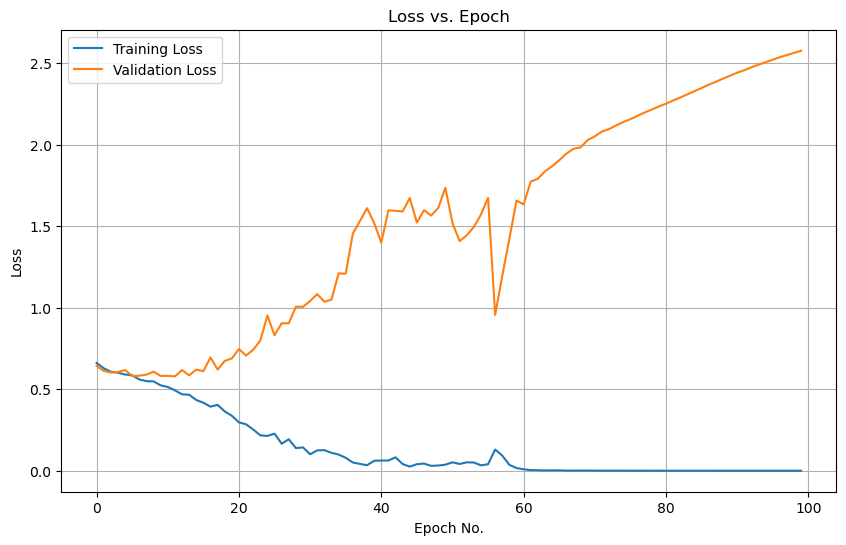

In [147]:
# Plotting training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch No.')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [148]:
# Combine the predictions with the actual labels and features for comparison
test_results3 = pd.DataFrame(X_test, columns=X.columns)
test_results3['Actual'] = y_test
test_results3['Predicted'] = y_test_pred_classes3
test_results3['Name'] = data.loc[test_results3.index, 'Name']

test_results3 = test_results3[[ 'Actual', 'Predicted']]

# Print a sample of the results
print(test_results3.head(15))

    Actual  Predicted
0        1          1
1        1          1
2        0          0
3        1          1
4        0          0
5        1          1
6        0          0
7        0          0
8        1          1
9        0          0
10       1          1
11       1          0
12       0          0
13       1          0
14       0          0


In [149]:

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_test_pred_classes3)
precision = precision_score(y_test, y_test_pred_classes3)
recall = recall_score(y_test, y_test_pred_classes3)
f1 = f1_score(y_test, y_test_pred_classes3)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_classes3))

Accuracy: 0.7901
Precision: 0.8446
Recall: 0.7290
F1 Score: 0.7825

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80       652
           1       0.84      0.73      0.78       701

    accuracy                           0.79      1353
   macro avg       0.80      0.79      0.79      1353
weighted avg       0.80      0.79      0.79      1353



## Model 4 - Random Forest

In [150]:
# Initialize the Random Forest model
model4 = RandomForestClassifier(max_depth=15,random_state=42)

# Train the model
model4.fit(X_train, y_train)

# Make predictions
y_train_pred4 = model4.predict(X_train)
y_val_pred4 = model4.predict(X_val)
y_test_pred4 = model4.predict(X_test)

# Evaluate the model
train_accuracy4 = accuracy_score(y_train, y_train_pred4)
val_accuracy4 = accuracy_score(y_val, y_val_pred4)
test_accuracy4 = accuracy_score(y_test, y_test_pred4)

precision4 = precision_score(y_test, y_test_pred4)
recall4 = recall_score(y_test, y_test_pred4)
f1_score4 = f1_score(y_test, y_test_pred4)

# Print the evaluation results
print(f"Training Accuracy: {train_accuracy4:.4f}")
print(f"Validation Accuracy: {val_accuracy4:.4f}")
print(f"Test Accuracy: {test_accuracy4:.4f}")
print(f"Precision: {precision4:.4f}")
print(f"Recall: {recall4:.4f}")
print(f"F1 Score: {f1_score4:.4f}")

# Confusion Matrix
conf_matrix4 = confusion_matrix(y_test, y_test_pred4)
print("Confusion Matrix:")
print(conf_matrix4)

Training Accuracy: 1.0000
Validation Accuracy: 0.8415
Test Accuracy: 0.8566
Precision: 0.8858
Recall: 0.8302
F1 Score: 0.8571
Confusion Matrix:
[[577  75]
 [119 582]]


/Users/seemavora/opt/anaconda3/envs/w207/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [151]:
# Make predictions on the test set
y_test_pred4 = model4.predict(X_test)

# Combine the predictions with the actual labels and features for comparison
test_results4 = pd.DataFrame(X_test, columns=X.columns)
test_results4['Actual'] = y_test
test_results4['Predicted'] = y_test_pred4

# Assuming 'data' has the original indices
test_results4['Name'] = data.iloc[test_results4.index]['Name']

# Select relevant columns for display
test_results4 = test_results4[['Name', 'Actual', 'Predicted']]

# Print a sample of the results
print(test_results4.sample(15))

      Name  Actual  Predicted
319   1845       1          1
149    556       1          0
135   1573       1          1
594    830       1          1
1300   895       1          1
200   1080       0          0
1143  3222       0          1
465   1397       0          0
717   3079       1          1
289   2988       0          0
966   1199       1          1
17     511       0          0
721   3137       0          0
293    870       0          0
904    640       0          0


/Users/seemavora/opt/anaconda3/envs/w207/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [152]:
# Feature importance
importances = model4.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
             Feature  Importance
14                ID    0.174772
5        Sprint_40yd    0.103466
13              Name    0.080403
9                BMI    0.075743
4             Weight    0.075147
1                Age    0.074216
2             School    0.068639
8         Broad_Jump    0.063853
6      Vertical_Jump    0.062036
7   Bench_Press_Reps    0.059619
3             Height    0.049695
0               Year    0.048372
12          Position    0.033255
11     Position_Type    0.016330
10       Player_Type    0.014454


In [153]:
# Create a dictionary to store the results
results = {
    'Model': ['Neural Network', 'Logistic Regression', 'CNN', 'Random Forest'],
    'Training Accuracy': [train_accuracy, train_accuracy2, train_accuracy3, train_accuracy4],
    'Validation Accuracy': [val_accuracy, val_accuracy2, val_accuracy3, val_accuracy4],
    'Test Accuracy': [test_accuracy, test_accuracy2, test_accuracy3, test_accuracy4]
}

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

                 Model  Training Accuracy  Validation Accuracy  Test Accuracy
0       Neural Network           0.950079             0.806656       0.807095
1  Logistic Regression           0.654517             0.683043       0.638581
2                  CNN           1.000000             0.778130       0.790096
3        Random Forest           1.000000             0.841521       0.856615


# Jenna Code

In [154]:
#selecting metrics 
j_data = new_data[['Height', 'Vertical_Jump', 'Sprint_40yd','Drafted']]
print(j_data['Drafted'].value_counts())
drop = j_data.dropna()
print(drop['Drafted'].value_counts())
#rebalancing the smaller dataset to be balanced after dropping nas
drafted_1 = drop[drop['Drafted'] == 1]
drafted_0 = drop[drop['Drafted'] == 0]

drafted_0_additional = resample(drafted_0, replace=True, n_samples = len(drafted_1), random_state = 42)
balanced_data = pd.concat([drafted_0_additional, drafted_1])

balanced_data

Drafted
1    2254
0    2254
Name: count, dtype: int64
Drafted
1    2254
0    2254
Name: count, dtype: int64


Height  Vertical_Jump  Sprint_40yd  Drafted
3414  1.9050          80.01         4.69        0
3192  1.8034         110.49         4.69        0
3430  1.8288          87.63         4.63        0
3187  1.9558          68.58         4.84        0
3258  2.0066          66.04         5.61        0
...      ...            ...          ...      ...
2249  1.9304          57.15         5.20        1
2250  1.8288          95.25         4.35        1
2251  1.7526          83.82         4.69        1
2252  1.9050          72.39         5.04        1
2253  1.8796          82.55         4.60        1

[4508 rows x 4 columns]

In [155]:
#split data into x and y
X = balanced_data.drop(columns=['Drafted'])
y = balanced_data['Drafted']
#train, val, test  split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, random_state= 42)

print("Training Data Size:", X_train.shape)
print("Validation Data Size:", X_val.shape)
print("Test Data Size:", X_test.shape)

Training Data Size: (2524, 3)
Validation Data Size: (631, 3)
Test Data Size: (1353, 3)


In [156]:
training_mean_x = np.mean(X_train, axis = 0)
training_std_x = np.std(X_train, axis = 0)
#standardize X values
X_train_1 = (X_train-training_mean_x)/training_std_x
X_val_1 = (X_val-training_mean_x)/training_std_x
X_test_1= (X_test-training_mean_x)/training_std_x

In [157]:
def build_model(num_features, learning_rate):
 
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      units=1,        
      input_shape=[num_features],  
      use_bias=True,              
      activation="sigmoid",
      kernel_initializer=tf.ones_initializer,  
      bias_initializer=tf.ones_initializer,    
  ))

  optimizer = tf.keras.optimizers.SGD(learning_rate= learning_rate)

  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics =['binary_accuracy'])
    
  return model

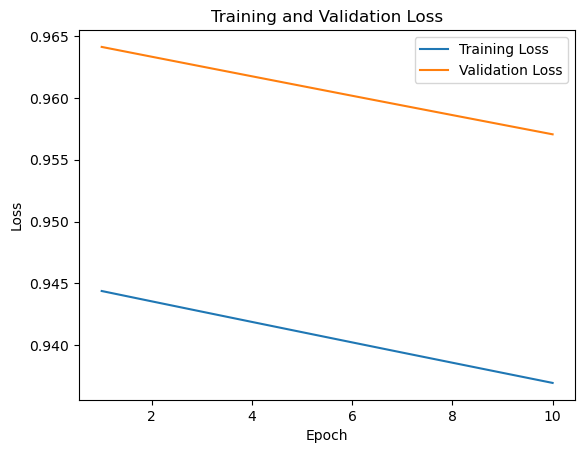

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Evaluating the results now:
79/79 [==============================] - 0s 616us/step - loss: 0.9365 - binary_accuracy: 0.5182
Training Accuracy: 0.5182
20/20 [==============================] - 0s 682us/step - loss: 0.9571 - binary_accuracy: 0.4960
Validation Accuracy: 0.4960
43/43 [==============================] - 0s 641us/step - loss: 0.9596 - binary_accuracy: 0.4974
Test Accuracy: 0.4974


In [158]:
tf.random.set_seed(0)
model_j1 = build_model(num_features = X_train_1.shape[1], learning_rate = 0.0001)

fit_j1 = model_j1.fit(x = X_train_1, y = y_train, validation_data = (X_val_1,y_val), epochs = 10, batch_size = 32, verbose = 0)
loss_train = fit_j1.history['loss']
loss_val = fit_j1.history['val_loss']
epoch = np.arange(1,len(loss_train)+1)
plt.plot(epoch,loss_train,label = 'Training Loss')
plt.plot(epoch,loss_val,label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#Model Summary
model_j1.summary()

print("Evaluating the results now:")
# Evaluate the model on the training set
train_lossj1, train_accuracyj1 = model_j1.evaluate(X_train_1, y_train)
print(f"Training Accuracy: {train_accuracyj1:.4f}")

# Evaluate the model on the validation set
val_lossj1, val_accuracyj1 = model_j1.evaluate(X_val_1, y_val)
print(f"Validation Accuracy: {val_accuracyj1:.4f}")

# Evaluate the model on the test set
test_lossj1, test_accuracyj1= model_j1.evaluate(X_test_1, y_test)
print(f"Test Accuracy: {test_accuracyj1:.4f}")

In [159]:
tf.random.set_seed(0)
model_j2= build_model(num_features = X_train_1.shape[1], learning_rate = 0.02)
model = model_j2.fit(x= X_train_1, y=y_train, validation_data = (X_val_1,y_val), epochs = 30, verbose = 0)

#Model Summary
model_j2.summary()

print("Evaluating the results now:")
# Evaluate the model on the training set
train_lossj2, train_accuracyj2 = model_j2.evaluate(X_train_1, y_train)
print(f"Training Accuracy: {train_accuracyj2:.4f}")

# Evaluate the model on the validation set
val_lossj2, val_accuracyj2 = model_j2.evaluate(X_val_1, y_val)
print(f"Validation Accuracy: {val_accuracyj2:.4f}")

# Evaluate the model on the test set
test_lossj2, test_accuracyj2= model_j2.evaluate(X_test_1, y_test)
print(f"Test Accuracy: {test_accuracyj2:.4f}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Evaluating the results now:
79/79 [==============================] - 0s 648us/step - loss: 0.6687 - binary_accuracy: 0.5745
Training Accuracy: 0.5745
20/20 [==============================] - 0s 692us/step - loss: 0.6781 - binary_accuracy: 0.5674
Validation Accuracy: 0.5674
43/43 [==============================] - 0s 639us/step - loss: 0.6846 - binary_accuracy: 0.5514
Test Accuracy: 0.5514


In [160]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#Random Forest With Limited Metrics
# Initialize the Random Forest model
model_j3 = RandomForestClassifier(max_depth=15,random_state=42)

# Train the model
model_j3.fit(X_train_1, y_train)

# Make predictions
y_train_j3 = model_j3.predict(X_train)
y_val_j3 = model_j3.predict(X_val)
y_test_j3 = model_j3.predict(X_test)

# Evaluate the model
train_accuracy_j3 = accuracy_score(y_train, y_train_j3)
val_accuracy_j3 = accuracy_score(y_val, y_val_j3)
test_accuracy_j3 = accuracy_score(y_test, y_test_j3)

precision_j3 = precision_score(y_test, y_test_j3)
recall_j3 = recall_score(y_test, y_test_j3)
f1_score_j3 = f1_score(y_test, y_test_j3)

# Print the evaluation results
print(f"Training Accuracy: {train_accuracy_j3:.4f}")
print(f"Validation Accuracy: {val_accuracy_j3:.4f}")
print(f"Test Accuracy: {test_accuracy_j3:.4f}")
print(f"Precision: {precision_j3:.4f}")
print(f"Recall: {recall_j3:.4f}")
print(f"F1 Score: {f1_score_j3:.4f}")

# Confusion Matrix
conf_matrix_j3 = confusion_matrix(y_test, y_test_j3)
print("Confusion Matrix:")
print(conf_matrix_j3)

Training Accuracy: 0.5103
Validation Accuracy: 0.4976
Test Accuracy: 0.4819
Precision: 0.4819
Recall: 1.0000
F1 Score: 0.6504
Confusion Matrix:
[[  0 701]
 [  0 652]]


# Seema's Code
Seema's model focuses on: Height, Weight, BMI, Vertical_Jump, and Broad_Jump

###  Cleaning Data and Encorporating Only Relevant Columns

In [161]:
dataS = pd.read_csv('./NFL.csv')
dataS['Drafted'] = dataS['Drafted'].map({'Yes': 1, 'No': 0}).astype('int')
dataS = dataS[['Height', 'Weight', 'BMI', 'Vertical_Jump', 'Broad_Jump', 'Drafted']]
print(dataS['Drafted'].value_counts())
drop = dataS.dropna()
print(drop['Drafted'].value_counts())
drafted_1 = dataS[dataS['Drafted'] == 1]
drafted_0 = dataS[dataS['Drafted'] == 0]

drafted_1.head()
drafted_1_sampled = drafted_1.sample(n=906, random_state=42)

balanced_dataS = pd.concat([drafted_1_sampled, drafted_0])

balanced_dataS = balanced_dataS.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_dataS['Drafted'].value_counts())

Drafted
1    2254
0    1223
Name: count, dtype: int64
Drafted
1    1793
0     906
Name: count, dtype: int64
Drafted
0    1223
1     906
Name: count, dtype: int64


### Data Prep: Balancing the Data, Shuffling Index, Data Split, & Standardization

In [162]:
index = balanced_dataS.index.to_list()
print(balanced_dataS.shape)
shuffled_index = np.random.permutation(index)
print('Shuffled Index: ', shuffled_index)
balanced_dataS = balanced_dataS.reindex(shuffled_index)
balanced_dataS = balanced_dataS.dropna()
print(balanced_dataS.shape)

(2129, 6)
Shuffled Index:  [ 552  247  763 ...  230 1486 1296]
(1634, 6)


In [163]:
Y = balanced_dataS[['Drafted']]
print('Shape of Y: ', Y.shape)
X = balanced_dataS[['Height', 'Weight', 'BMI', 'Vertical_Jump', 'Broad_Jump']].dropna()
print('Shape of X: ', X.shape)

Shape of Y:  (1634, 1)
Shape of X:  (1634, 5)


In [164]:
from sklearn.model_selection import train_test_split
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=1234)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=1234)

print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_val: ", X_val.shape)
print("Shape of Y_val: ", Y_val.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (980, 5)
Shape of Y_train:  (980, 1)
Shape of X_val:  (327, 5)
Shape of Y_val:  (327, 1)
Shape of X_test:  (327, 5)
Shape of Y_test:  (327, 1)


In [165]:
X_train_quantiles = X_train.quantile([0.25, 0.5, 0.75, 0.95])

mean = X_train.mean()
std = X_train.std()
X_train_std = (X_train - mean) /std
X_val_std = (X_val - mean) /std
X_test_std = (X_test - mean) /std

mean = Y_train.mean()
std = Y_train.std()
Y_train_std = (Y_train - mean) /std
Y_val_std = (Y_val - mean) /std
Y_test_std = (Y_test - mean) /std

### Model 1: Linear Regression

In [166]:
# Model #1: 
import tensorflow as tf

def build_model(num_features, learning_rate):
  """Build a TF linear regression model using Keras.

  Args:
    num_features: The number of input features.
    learning_rate: The desired learning rate for SGD.

  Returns:
    model: A tf.keras model (graph).
  """

  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      units=1,        # output dim
      input_shape=[num_features],  # input dim
      use_bias=True,               # use a bias (intercept) param
      kernel_initializer=tf.ones_initializer,  # initialize params to 1
      bias_initializer=tf.ones_initializer    # initialize bias to 1
  ))

  # We need to choose an optimizer. We'll use GD, which is actually mini-batch GD
  optimizer =  tf.keras.optimizers.SGD(learning_rate=learning_rate)

  # Finally, compile the model. This finalizes the graph for training.
  # We specify the loss and the optimizer above
  model.compile(
        optimizer=optimizer,
        loss='mse', 
        metrics = ['accuracy']
  )
    
  return model

[3.966517210006714, 3.043874502182007, 2.481881618499756, 2.0934898853302, 1.8106495141983032, 1.6016424894332886, 1.445304036140442, 1.3273974657058716, 1.237828254699707, 1.1698371171951294, 1.1177722215652466, 1.0782358646392822, 1.0474308729171753, 1.0234341621398926, 1.0046827793121338, 0.9900572299957275, 0.9785410761833191, 0.9695042967796326, 0.962413489818573, 0.956775963306427]


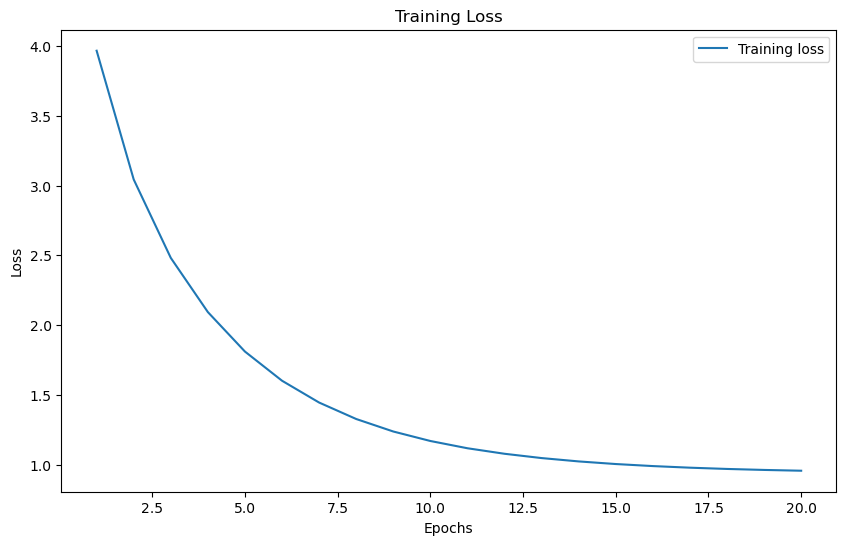

In [167]:
tf.random.set_seed(0)

model_tf = build_model(
        num_features=X_train_std.shape[1],
        learning_rate=.0001)

# 3. Fit the model
baseline_fit_tf = model_tf.fit(
      x = X_train_std,
      y = Y_train_std,
      validation_data=(X_val_std, Y_val_std),
      epochs=20,
      batch_size=1, #use all the data
      verbose=0)

#4
loss = baseline_fit_tf.history['loss']
epochs = range(1, len(loss) + 1)
print(loss)
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

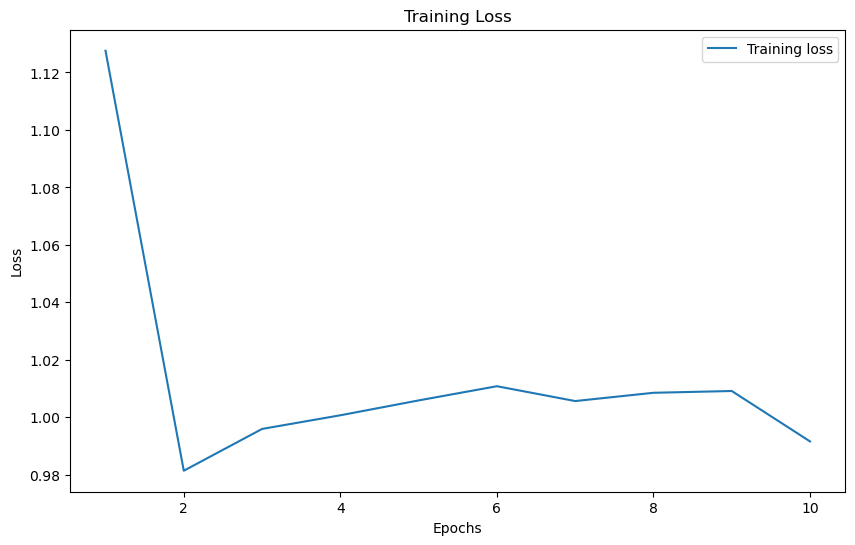

2. Learned parameters of the model:
  [array([[0.08317622],
       [0.20652968],
       [0.1313869 ],
       [0.21771488],
       [0.1902622 ]], dtype=float32), array([-0.01837446], dtype=float32)]
3. The loss at the final epoch:  0.9915940761566162
4. The percentage loss between validation and training is:  2.0 % 


In [168]:
tf.random.set_seed(0)
# YOUR CODE HERE

model_tf = build_model(
        num_features=X_train_std.shape[1],
        learning_rate=.01)

# 3. Fit the model
baseline_fit_tf = model_tf.fit(
      x = X_train_std,
      y = Y_train_std,
      validation_data=(X_val_std, Y_val_std),
      epochs=10,
      batch_size=1, #use all the data
      verbose=0)

loss = baseline_fit_tf.history['loss']
val_loss = baseline_fit_tf.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print('2. Learned parameters of the model:\n ', model_tf.layers[0].get_weights())
print('3. The loss at the final epoch: ', loss[-1])
val_loss = baseline_fit_tf.history['val_loss'][-1]
percent = round(((val_loss - loss[-1]) /loss[-1])*100,2)

# print(loss)
print('4. The percentage loss between validation and training is: ', percent, '% ')

In [169]:
train_loss, train_accuracy = model_tf.evaluate(X_train, Y_train, verbose = 0)
test_loss, test_accuracy = model_tf.evaluate(X_test, Y_test, verbose = 0)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

if abs(train_accuracy - test_accuracy) < 0.5:
    print("Yes, the model can be generalized.")
else:
    print("No, the model may not generalize well.")

Training Accuracy: 0.4204081594944
Test Accuracy: 0.4678899049758911
Yes, the model can be generalized.


### Model #2 Logistic Regression

In [172]:
import tensorflow as tf

# Initialize the logistic regression model
num_features = X_train_std.shape[1]
learning_rate = 0.01

model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(
    units=1,        # output dim
    input_shape=(num_features,),  # input dim
    use_bias=True,               # use a bias (intercept) param
    activation='sigmoid',
    kernel_initializer=tf.keras.initializers.GlorotUniform(),  # use a standard initializer
    bias_initializer=tf.keras.initializers.Ones(),    # initialize bias to 1
))

# Choose an optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

# Compile the model
model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history2 = model2.fit(X_train_std, Y_train, epochs=50, batch_size=8, validation_data=(X_val_std, Y_val), verbose=1)

# Model Summary
model2.summary()




Epoch 1/50
123/123 [==============================] - 1s 2ms/step - loss: 0.9190 - accuracy: 0.4194 - val_loss: 0.7742 - val_accuracy: 0.4924
Epoch 2/50
123/123 [==============================] - 0s 1ms/step - loss: 0.8170 - accuracy: 0.4408 - val_loss: 0.7232 - val_accuracy: 0.5046
Epoch 3/50
123/123 [==============================] - 0s 1ms/step - loss: 0.7515 - accuracy: 0.4663 - val_loss: 0.6946 - val_accuracy: 0.5535
Epoch 4/50
123/123 [==============================] - 0s 1ms/step - loss: 0.7105 - accuracy: 0.5224 - val_loss: 0.6807 - val_accuracy: 0.5719
Epoch 5/50
123/123 [==============================] - 0s 1ms/step - loss: 0.6862 - accuracy: 0.5541 - val_loss: 0.6747 - val_accuracy: 0.5719
Epoch 6/50
123/123 [==============================] - 0s 1ms/step - loss: 0.6717 - accuracy: 0.5776 - val_loss: 0.6728 - val_accuracy: 0.5902
Epoch 7/50
123/123 [==============================] - 0s 1ms/step - loss: 0.6629 - accuracy: 0.6000 - val_loss: 0.6726 - val_accuracy: 0.5810
Epoch 

In [173]:
print("Evaluating the results now:")
# Evaluate the model on the training set
train_loss2, train_accuracy2 = model2.evaluate(X_train_std, Y_train)
print(f"Training Accuracy: {train_accuracy2:.4f}")

# Evaluate the model on the validation set
val_loss2, val_accuracy2 = model2.evaluate(X_val_std, Y_val)
print(f"Validation Accuracy: {val_accuracy2:.4f}")

# Evaluate the model on the test set
test_loss2, test_accuracy2 = model2.evaluate(X_test_std, Y_test)
print(f"Test Accuracy: {test_accuracy2:.4f}")

Evaluating the results now:
31/31 [==============================] - 0s 758us/step - loss: 0.6458 - accuracy: 0.6163
Training Accuracy: 0.6163
11/11 [==============================] - 0s 871us/step - loss: 0.6802 - accuracy: 0.5780
Validation Accuracy: 0.5780
11/11 [==============================] - 0s 836us/step - loss: 0.6717 - accuracy: 0.6147
Test Accuracy: 0.6147
